### Họ và tên: Trần Gia Long
### MSSV: N20DCCN035
### Lớp: D20CQCNPM01-N

## Bài 6

In [2]:
import numpy as np
import matplotlib.pylab as plt
import cv2

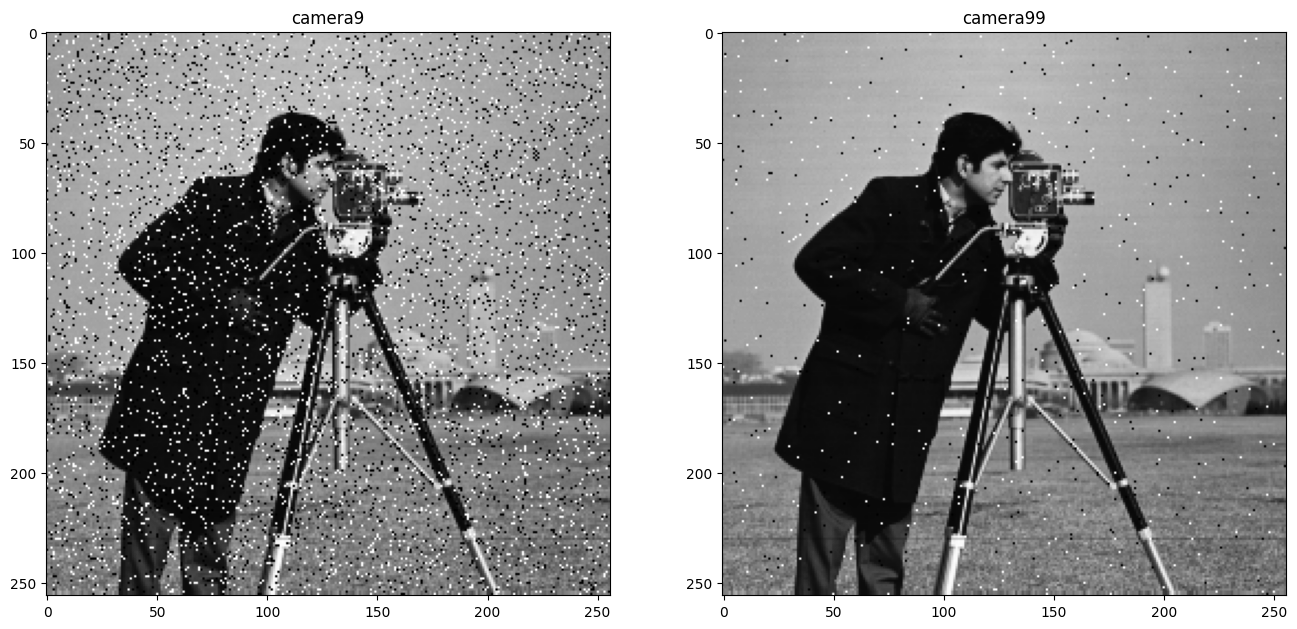

In [3]:
camera9=np.fromfile('camera9.bin',dtype=np.uint8).reshape(256,256)
camera99=np.fromfile('camera99.bin',dtype=np.uint8).reshape(256,256)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('camera9')
plt.imshow(camera9,cmap='gray')

plt.subplot(1,2,2)
plt.title('camera99')
plt.imshow(camera99,cmap='gray')

#### PP1: Dùng thư viện

In [46]:
def apply_median_filter(img,kernel_size):
    return cv2.medianBlur(img,kernel_size)

def apply_morphological_opening(img,kernel_size):
    kernel=np.ones((kernel_size,kernel_size),np.uint8)
    return cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

def apply_morphological_closing(img,kernel_size):
    kernel=np.ones((kernel_size,kernel_size),np.uint8)
    return cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

In [47]:
median_camera9=apply_median_filter(camera9,3)
open_camera9=apply_morphological_opening(camera9,3)
close_camera9=apply_morphological_closing(camera9,3)

median_camera99=apply_median_filter(camera99,3)
open_camera99=apply_morphological_opening(camera99,3)
close_camera99=apply_morphological_closing(camera99,3)

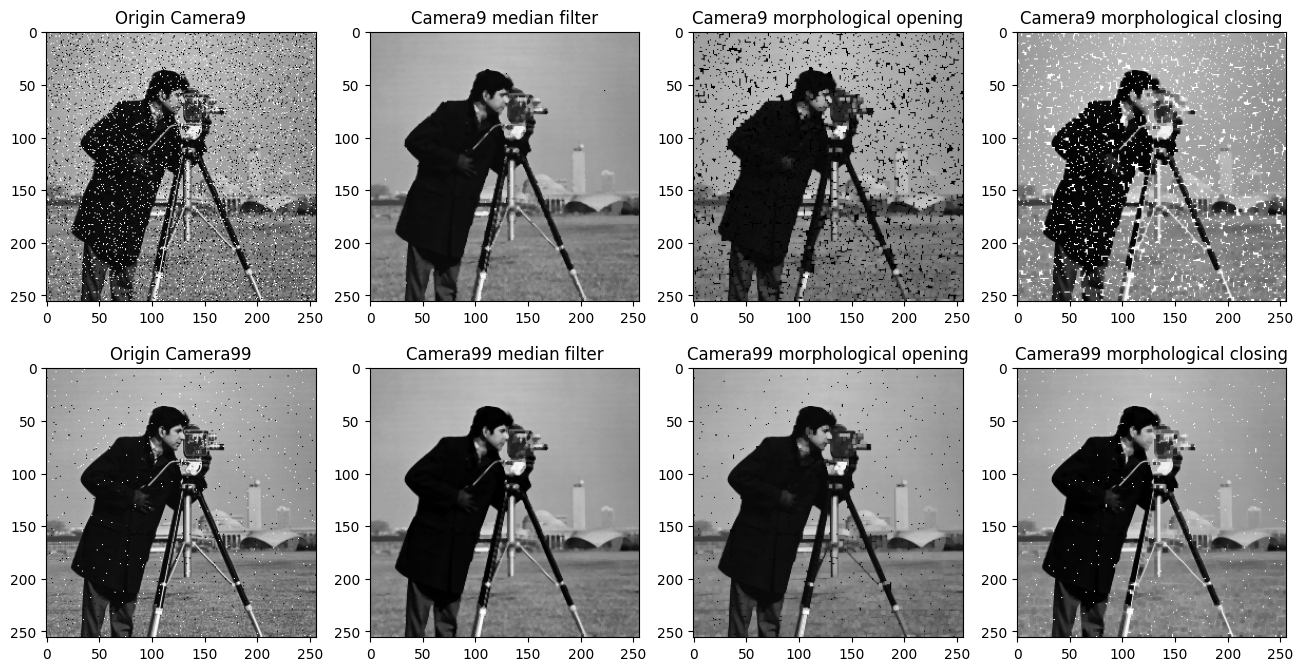

In [48]:
plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.title('Origin Camera9')
plt.imshow(camera9,cmap='gray')

plt.subplot(2,4,2)
plt.title('Camera9 median filter')
plt.imshow(median_camera9,cmap='gray')

plt.subplot(2,4,3)
plt.title('Camera9 morphological opening')
plt.imshow(open_camera9,cmap='gray')

plt.subplot(2,4,4)
plt.title('Camera9 morphological closing')
plt.imshow(close_camera9,cmap='gray')

plt.subplot(2,4,5)
plt.title('Origin Camera99')
plt.imshow(camera99,cmap='gray')

plt.subplot(2,4,6)
plt.title('Camera99 median filter')
plt.imshow(median_camera99,cmap='gray')

plt.subplot(2,4,7)
plt.title('Camera99 morphological opening')
plt.imshow(open_camera99,cmap='gray')

plt.subplot(2,4,8)
plt.title('Camera99 morphological closing')
plt.imshow(close_camera99,cmap='gray')

#### PP2: Tạo hàm bằng thuật toán

In [1]:
def apply_solution(img,kernel_size):
    step=(kernel_size-1)//2
    median=np.zeros_like(img)
    min=np.zeros_like(img)
    max=np.zeros_like(img)
    open=np.zeros_like(img)
    close=np.zeros_like(img)
    temp=np.zeros((img.shape[0]+step*2,img.shape[1]+step*2)) 
    temp[step:temp.shape[0]-step,step:temp.shape[1]-step]=img

    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            X=temp[i:i+kernel_size,j:j+kernel_size]
            median[i,j]=np.median(X)
            min[i,j]=np.min(X)
            max[i,j]=np.max(X)

    temp[step:temp.shape[0]-step,step:temp.shape[1]-step]=min
    min=temp
    temp2=np.zeros_like(temp)
    temp2[step:temp2.shape[0]-step,step:temp2.shape[1]-step]=max
    max=temp2
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            X=min[i:i+kernel_size,j:j+kernel_size]
            open[i,j]=np.max(X)
            X=max[i:i+kernel_size,j:j+kernel_size]
            close[i,j]=np.min(X)
    
    return median,open,close

In [8]:
median_camera9,open_camera9,close_camera9=apply_solution(camera9,3)
median_camera99,open_camera99,close_camera99=apply_solution(camera99,3)

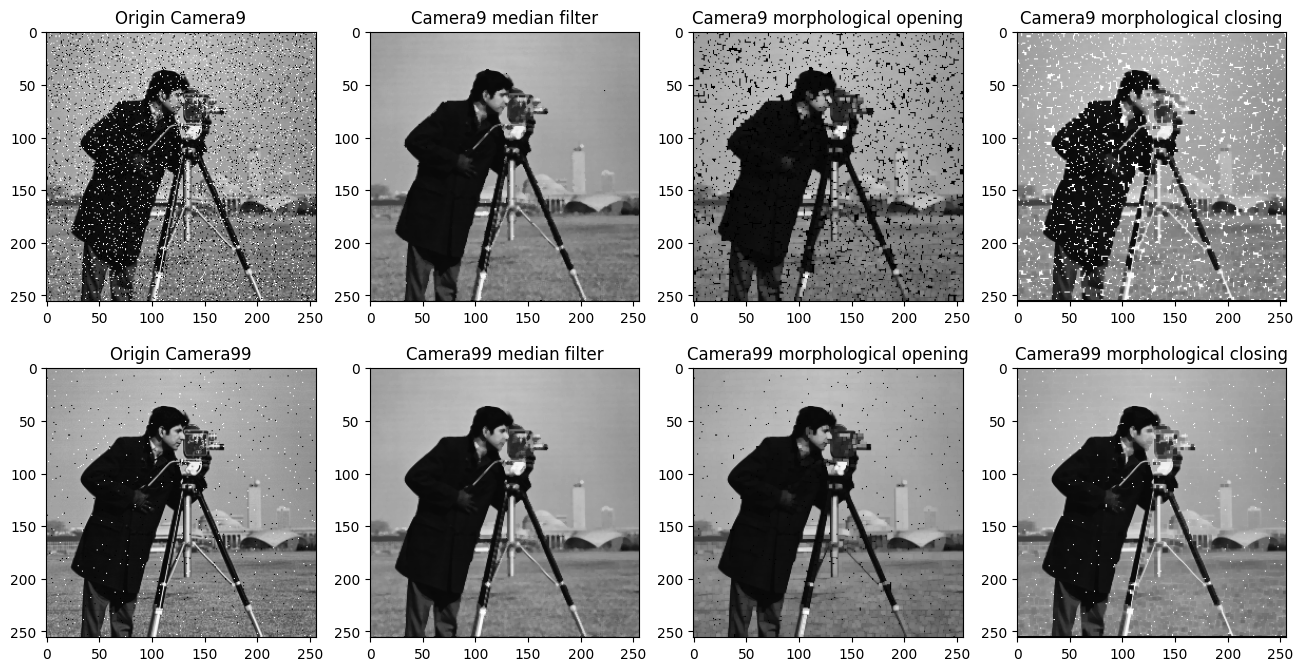

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.title('Origin Camera9')
plt.imshow(camera9,cmap='gray')

plt.subplot(2,4,2)
plt.title('Camera9 median filter')
plt.imshow(median_camera9,cmap='gray')

plt.subplot(2,4,3)
plt.title('Camera9 morphological opening')
plt.imshow(open_camera9,cmap='gray')

plt.subplot(2,4,4)
plt.title('Camera9 morphological closing')
plt.imshow(close_camera9,cmap='gray')

plt.subplot(2,4,5)
plt.title('Origin Camera99')
plt.imshow(camera99,cmap='gray')

plt.subplot(2,4,6)
plt.title('Camera99 median filter')
plt.imshow(median_camera99,cmap='gray')

plt.subplot(2,4,7)
plt.title('Camera99 morphological opening')
plt.imshow(open_camera99,cmap='gray')

plt.subplot(2,4,8)
plt.title('Camera99 morphological closing')
plt.imshow(close_camera99,cmap='gray')